<a href="https://colab.research.google.com/github/kumass2020/Algorithms-Problems/blob/main/KEPCO_data_prediction_Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# # colab에 구글 드라이브 연동
# from google.colab import drive
# from os.path import join
# ROOT = "/content/drive"
# print(ROOT)
# drive.mount(ROOT)

In [2]:
!pip install pystan
!pip install fbprophet
from fbprophet import Prophet

import matplotlib.pyplot as plt

In [3]:
from google.colab import files
myfile = files.upload()
import io
import pandas as pd
data_df = pd.read_excel(io.BytesIO(myfile['KEPCO_data.xlsx']))
data_df

Saving KEPCO_data.xlsx to KEPCO_data.xlsx


,날짜,01:00,02:00,03:00,04:00,05:00,06:00,07:00,08:00,09:00,10:00,11:00,12:00,13:00,14:00,15:00,16:00,17:00,18:00,19:00,20:00,21:00,22:00,23:00,24:00,합계(kWh)
0,2021.12.17,0.494,0.246,0.193,0.180,0.170,0.155,0.169,0.264,0.111,0.148,0.223,0.121,0.082,0.077,0.062,0.061,0.061,0.079,0.323,0.361,0.318,0.329,0.353,0.350,4.930
1,2021.12.16,0.184,0.172,0.163,0.164,0.176,0.170,0.146,0.221,0.215,0.122,0.106,0.106,0.106,0.103,0.104,0.105,0.104,0.205,0.394,0.473,0.390,0.368,0.351,0.768,5.416
2,2021.12.15,0.229,0.216,0.208,0.198,0.180,0.180,0.182,0.245,0.187,0.265,0.115,0.110,0.106,0.103,0.104,0.105,0.103,0.103,0.191,0.250,0.227,0.549,0.645,0.195,4.996
3,2021.12.14,0.623,0.292,0.209,0.204,0.216,0.211,0.192,0.372,0.131,0.136,0.142,0.138,0.108,0.137,0.073,0.063,0.064,0.065,0.063,0.342,0.356,0.311,0.627,0.385,5.460
4,2021.12.13,0.408,0.237,0.193,0.176,0.192,0.188,0.182,0.258,0.263,0.122,0.106,0.104,0.105,0.105,0.103,0.104,0.259,0.081,0.060,0.082,0.272,0.372,0.454,0.672,5.098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2020.12.21,0.181,0.223,0.218,0.208,0.312,0.272,0.264,0.272,0.488,0.511,0.343,0.217,0.222,0.232,0.227,0.262,0.267,0.360,0.502,0.595,0.501,0.395,0.341,0.215,7.628
362,2020.12.20,0.360,0.282,0.258,0.327,0.303,0.290,0.310,0.321,0.321,0.310,0.365,0.305,0.436,0.430,0.461,0.325,0.318,0.272,0.616,0.453,0.352,0.377,0.219,0.225,8.236
363,2020.12.19,0.275,0.279,0.276,0.415,0.414,0.322,0.326,0.416,0.380,0.342,0.684,0.593,0.347,0.252,0.316,0.265,0.291,0.302,0.349,0.247,0.223,NaN,0.000,0.382,7.696
364,2020.12.18,0.261,0.205,0.229,0.255,0.205,0.237,0.229,0.250,0.457,0.355,0.273,0.319,0.191,0.202,0.253,0.191,0.191,0.231,0.363,0.429,0.553,0.502,0.489,0.398,7.268


In [4]:
print(data_df.shape)
print(data_df.head())

(366, 26)
           날짜  01:00  02:00  03:00  04:00  ...  21:00  22:00  23:00  24:00  합계(kWh)
0  2021.12.17  0.494  0.246  0.193  0.180  ...  0.318  0.329  0.353  0.350    4.930
1  2021.12.16  0.184  0.172  0.163  0.164  ...  0.390  0.368  0.351  0.768    5.416
2  2021.12.15  0.229  0.216  0.208  0.198  ...  0.227  0.549  0.645  0.195    4.996
3  2021.12.14  0.623  0.292  0.209  0.204  ...  0.356  0.311  0.627  0.385    5.460
4  2021.12.13  0.408  0.237  0.193  0.176  ...  0.272  0.372  0.454  0.672    5.098

[5 rows x 26 columns]


In [5]:
# 날짜가 최신일부터 나오므로 역순으로 재구성
r_idx = [i for i in range(data_df.shape[0]-1, -1, -1)]

# r_data_df = pd.DataFrame(data_df, index=r_idx)
# r_data_df = r_data_df.reset_index(drop=True)
r_data_df = data_df[::-1].reset_index(drop=True)  # Simple way
r_data_df

,날짜,01:00,02:00,03:00,04:00,05:00,06:00,07:00,08:00,09:00,10:00,11:00,12:00,13:00,14:00,15:00,16:00,17:00,18:00,19:00,20:00,21:00,22:00,23:00,24:00,합계(kWh)
0,2020.12.17,0.313,0.274,0.312,0.284,0.275,0.309,0.280,0.280,0.776,0.495,0.410,0.378,0.394,0.305,0.243,0.267,0.382,0.405,0.490,0.668,0.633,0.531,0.492,0.338,9.534
1,2020.12.18,0.261,0.205,0.229,0.255,0.205,0.237,0.229,0.250,0.457,0.355,0.273,0.319,0.191,0.202,0.253,0.191,0.191,0.231,0.363,0.429,0.553,0.502,0.489,0.398,7.268
2,2020.12.19,0.275,0.279,0.276,0.415,0.414,0.322,0.326,0.416,0.380,0.342,0.684,0.593,0.347,0.252,0.316,0.265,0.291,0.302,0.349,0.247,0.223,NaN,0.000,0.382,7.696
3,2020.12.20,0.360,0.282,0.258,0.327,0.303,0.290,0.310,0.321,0.321,0.310,0.365,0.305,0.436,0.430,0.461,0.325,0.318,0.272,0.616,0.453,0.352,0.377,0.219,0.225,8.236
4,2020.12.21,0.181,0.223,0.218,0.208,0.312,0.272,0.264,0.272,0.488,0.511,0.343,0.217,0.222,0.232,0.227,0.262,0.267,0.360,0.502,0.595,0.501,0.395,0.341,0.215,7.628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2021.12.13,0.408,0.237,0.193,0.176,0.192,0.188,0.182,0.258,0.263,0.122,0.106,0.104,0.105,0.105,0.103,0.104,0.259,0.081,0.060,0.082,0.272,0.372,0.454,0.672,5.098
362,2021.12.14,0.623,0.292,0.209,0.204,0.216,0.211,0.192,0.372,0.131,0.136,0.142,0.138,0.108,0.137,0.073,0.063,0.064,0.065,0.063,0.342,0.356,0.311,0.627,0.385,5.460
363,2021.12.15,0.229,0.216,0.208,0.198,0.180,0.180,0.182,0.245,0.187,0.265,0.115,0.110,0.106,0.103,0.104,0.105,0.103,0.103,0.191,0.250,0.227,0.549,0.645,0.195,4.996
364,2021.12.16,0.184,0.172,0.163,0.164,0.176,0.170,0.146,0.221,0.215,0.122,0.106,0.106,0.106,0.103,0.104,0.105,0.104,0.205,0.394,0.473,0.390,0.368,0.351,0.768,5.416


AttributeError: ignored

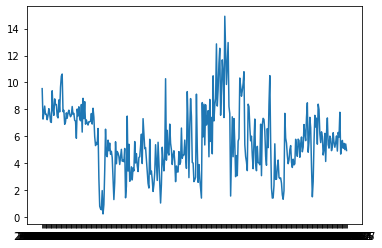

In [11]:
# 사용량 그래프, 양상 파악
fig = plt.figure()
# ax = fig.add_subplot(1, 1, 1)

ax.plot(r_data_df['날짜'], r_data_df['합계(kWh)'])

ax.xticks(ticks=r_data_df['날짜'], labels=r_data_df['날짜'])
ax.set_ylabel('b')
ax.set_xlabel('a')
ax.locator_params(axis='x', nbins=int(r_data_df.shape[0]/30))
plt.show()

print(r_data_df.shape[0]/30)